In [192]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import date

In [193]:
sns.set_style("dark")

pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.set_option('display.max_columns', None)

# Educação de nível superior no Brasil

### Integrantes do Grupo
- Marcos Vinicius Araujo
- Breno Marot
- Gabriel Banaggia


## Primeiros passos 

Esse dataset se trata de informações demográficas de nível superior na educação do brasil, como curso, renda percapta etc.

In [194]:
# lendo o dataset

df = pd.read_csv('.\\data\\education.csv', sep=';', index_col='id_masked')
df.head()

,safra_entrada,dt_nascimento,vl_renda_percapta,vl_renda_familiar_bruta_mensal,nu_percentual_solicitado,sexo,ds_raca_cor,ds_estado_civil,sg_uf_curso,no_municipio_curso,no_curso,co_curso,ultimo_aditamento,tipo_ultimo_aditamento,qtd_cursada_total,qt_semestre_financiamento,semestre_encerramento,banco,st_fase_contrato,vl_total_liberado,vl_saldo_devedor,nu_dias_atraso,vl_saldo_devedor_atrasado,vl_nota_enem_considerada
id_masked,,,,,,,,,,,,,,,,,,,,,,,,
654,2013S1,1983-11-10,"356,00","1068,00","100,00",F,BRANCO,DIVORCIADO,MS,DOURADOS,ADMINISTRACAO,54656.000,2014S1,Encerramento,2.000,2.000,12014.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
968,2014S2,1983-07-01,"1916,85","1916,85","100,00",F,PARDO,CASADO,MA,SAO LUIS,ENFERMAGEM,96713.000,2015S2,Encerramento,2.000,2.000,22015.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067,2013S1,1989-12-07,"2700,00","2700,00","100,00",F,NEGRO,SOLTEIRO,RO,CACOAL,DIREITO,49820.000,2017S2,Renovacao,10.000,10.000,NaN,BB,A,"57902,67","55726,23",0.000,"0,00",NaN
2214,2012S1,1979-10-08,"272,99","818,98","100,00",F,PARDO,SOLTEIRO,SE,ARACAJU,ENFERMAGEM,118882.000,2016S2,Renovacao,10.000,10.000,NaN,CX,A,"56159,08","64236,79",1025.000,"14170,86",NaN
2298,2013S2,1989-04-09,"1200,00","1200,00","100,00",F,PARDO,CASADO,RJ,CABO FRIO,FISIOTERAPIA,82838.000,2015S1,Encerramento,3.000,3.000,12015.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2864538 entries, 654 to 2864538
Data columns (total 24 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   safra_entrada                   object 
 1   dt_nascimento                   object 
 2   vl_renda_percapta               object 
 3   vl_renda_familiar_bruta_mensal  object 
 4   nu_percentual_solicitado        object 
 5   sexo                            object 
 6   ds_raca_cor                     object 
 7   ds_estado_civil                 object 
 8   sg_uf_curso                     object 
 9   no_municipio_curso              object 
 10  no_curso                        object 
 11  co_curso                        float64
 12  ultimo_aditamento               object 
 13  tipo_ultimo_aditamento          object 
 14  qtd_cursada_total               float64
 15  qt_semestre_financiamento       float64
 16  semestre_encerramento           float64
 17  banco                         

In [196]:
%timeit df

33 ns ± 3.98 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [197]:
df.describe()

,co_curso,qtd_cursada_total,qt_semestre_financiamento,semestre_encerramento,nu_dias_atraso,vl_nota_enem_considerada
count,2864468.000,2864537.000,2864532.000,207621.000,2749362.000,925210.000
mean,454511.880,6.343,8.191,16528.037,617.194,536.258
std,867513.063,3.575,2.254,4976.018,863.347,295.535
min,849.000,1.000,0.000,12010.000,0.000,0.000
25%,48600.000,3.000,7.000,12015.000,0.000,497.100
50%,89890.000,7.000,8.000,12018.000,112.000,533.900
75%,1057458.000,10.000,10.000,22014.000,1112.000,573.460
max,5001459.000,22.000,26.000,22021.000,7352.000,32901.000


## Performance do dataset

Um passo importante para focar é na performance do dataset e a alteração para tipagem correta. Com eles, podemos diminuir o tempo de execução das operações. [Documentação do pandas sobre performance](https://pandas.pydata.org/docs/user_guide/enhancingperf.html)

In [198]:
# removing problematic line
df = df.drop([df.index[2516155]])

# performance
df['dt_nascimento'] = pd.to_datetime(df['dt_nascimento'], yearfirst=True, format="%Y-%m-%d")
df['vl_renda_percapta'] = df['vl_renda_percapta'].apply(lambda x : float(str(x).replace(',', '.')))
df['vl_renda_familiar_bruta_mensal'] = df['vl_renda_familiar_bruta_mensal'].apply(lambda x : float(str(x).replace(',', '.')))
df['nu_percentual_solicitado'] = df['nu_percentual_solicitado'].apply(lambda x : float(str(x).replace(',', '.')))
df['vl_total_liberado'] = df['vl_total_liberado'].apply(lambda x : float(str(x).replace(',', '.')))
df['vl_saldo_devedor'] = df['vl_saldo_devedor'].apply(lambda x : float(str(x).replace(',', '.')))
df['nu_dias_atraso'] = df['nu_dias_atraso'].fillna(0).astype(int)
df['vl_saldo_devedor_atrasado'] = df['vl_saldo_devedor_atrasado'].apply(lambda x : float(str(x).replace(',', '.')))
df['co_curso'] = df['co_curso'].fillna(0).astype(int)
df['qtd_cursada_total'] = df['qtd_cursada_total'].fillna(0).astype(int)
df['qt_semestre_financiamento'] = df['qt_semestre_financiamento'].fillna(0).astype(int)
df['semestre_encerramento'] = df['semestre_encerramento'].astype(str)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2864537 entries, 654 to 2864538
Data columns (total 24 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   safra_entrada                   object        
 1   dt_nascimento                   datetime64[ns]
 2   vl_renda_percapta               float64       
 3   vl_renda_familiar_bruta_mensal  float64       
 4   nu_percentual_solicitado        float64       
 5   sexo                            object        
 6   ds_raca_cor                     object        
 7   ds_estado_civil                 object        
 8   sg_uf_curso                     object        
 9   no_municipio_curso              object        
 10  no_curso                        object        
 11  co_curso                        int32         
 12  ultimo_aditamento               object        
 13  tipo_ultimo_aditamento          object        
 14  qtd_cursada_total               int32         
 15  q

In [200]:
%timeit df

40.7 ns ± 8.84 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [201]:
# removendo colunas redundantes

df.drop(
        ['co_curso',
         'st_fase_contrato',
         'ultimo_aditamento',
         'no_municipio_curso',
         'qt_semestre_financiamento'], 
        axis=1, 
        inplace=True
    )

In [202]:
df['banco'].count() / df['banco'].size

0.9597924551157831

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2864537 entries, 654 to 2864538
Data columns (total 19 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   safra_entrada                   object        
 1   dt_nascimento                   datetime64[ns]
 2   vl_renda_percapta               float64       
 3   vl_renda_familiar_bruta_mensal  float64       
 4   nu_percentual_solicitado        float64       
 5   sexo                            object        
 6   ds_raca_cor                     object        
 7   ds_estado_civil                 object        
 8   sg_uf_curso                     object        
 9   no_curso                        object        
 10  tipo_ultimo_aditamento          object        
 11  qtd_cursada_total               int32         
 12  semestre_encerramento           object        
 13  banco                           object        
 14  vl_total_liberado               float64       
 15  v

# Análise Exploratória

## Analisando cursos

In [204]:
df.corr(numeric_only=True)

,vl_renda_percapta,vl_renda_familiar_bruta_mensal,nu_percentual_solicitado,qtd_cursada_total,vl_total_liberado,vl_saldo_devedor,nu_dias_atraso,vl_saldo_devedor_atrasado,vl_nota_enem_considerada
vl_renda_percapta,1.000,0.715,-0.386,0.038,0.152,0.125,-0.175,-0.117,0.049
vl_renda_familiar_bruta_mensal,0.715,1.000,-0.376,0.041,0.203,0.172,-0.230,-0.157,0.070
nu_percentual_solicitado,-0.386,-0.376,1.000,0.185,0.159,0.150,0.197,0.234,-0.060
qtd_cursada_total,0.038,0.041,0.185,1.000,0.483,0.464,-0.194,0.114,-0.036
vl_total_liberado,0.152,0.203,0.159,0.483,1.000,0.973,-0.209,0.066,0.096
vl_saldo_devedor,0.125,0.172,0.150,0.464,0.973,1.000,-0.138,0.134,0.095
nu_dias_atraso,-0.175,-0.230,0.197,-0.194,-0.209,-0.138,1.000,0.561,-0.056
vl_saldo_devedor_atrasado,-0.117,-0.157,0.234,0.114,0.066,0.134,0.561,1.000,-0.050
vl_nota_enem_considerada,0.049,0.070,-0.060,-0.036,0.096,0.095,-0.056,-0.050,1.000


<Axes: title={'center': 'Top 25 cursos financiados'}, ylabel='no_curso'>

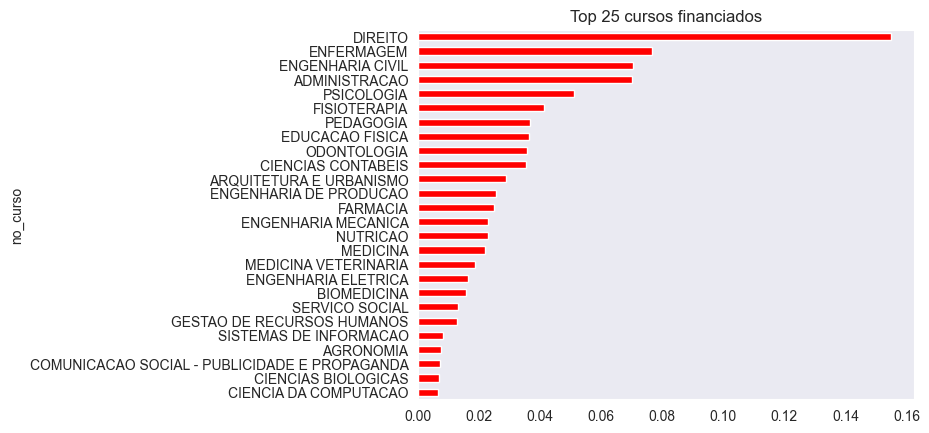

In [205]:
freq_curso = df['no_curso'].value_counts(normalize=True)

freq_curso[25::-1].plot(kind='barh', color='red', title='Top 25 cursos financiados')

In [206]:
f'Percentual de pessoal dos Top 25 cursos:{freq_curso[:50].sum() / freq_curso.sum() * 100 : .2f}%'

'Percentual de pessoal dos Top 25 cursos: 95.07%'

## Safra de entrada

In [207]:
df['safra_entrada'].unique()

array(['2013S1', '2014S2', '2012S1', '2013S2', '2010S2', '2011S2',
       '2011S1', '2012S2', '2014S1', '2010S1', '2015S1', '2018S1',
       '2017S2', '2017S1', '2016S2', '2022S1', '2016S1', '2018S2',
       '2021S2', '2019S1', '2015S2', '2021S1', '2019S2', '2020S1',
       '2020S2'], dtype=object)

In [208]:
df['safra_entrada'] = df['safra_entrada'].apply(lambda x : x.replace('S', '.'))

df['safra_entrada'].unique()

array(['2013.1', '2014.2', '2012.1', '2013.2', '2010.2', '2011.2',
       '2011.1', '2012.2', '2014.1', '2010.1', '2015.1', '2018.1',
       '2017.2', '2017.1', '2016.2', '2022.1', '2016.1', '2018.2',
       '2021.2', '2019.1', '2015.2', '2021.1', '2019.2', '2020.1',
       '2020.2'], dtype=object)

## Data de Nascimento

In [209]:
def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [210]:
df['idade'] = df['dt_nascimento'].apply(calculate_age)

<Axes: xlabel='idade', ylabel='Count'>

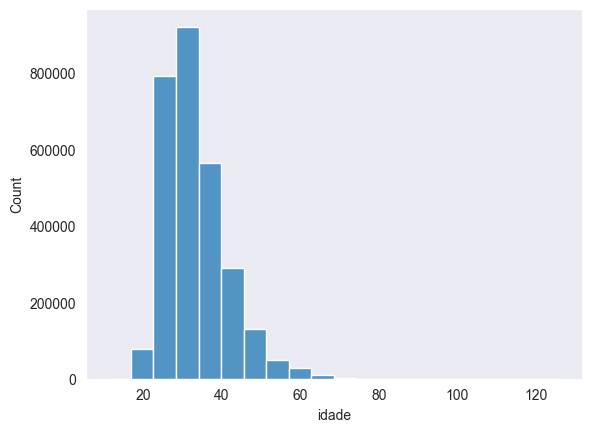

In [211]:
sns.histplot(
    data=df['idade'],
    stat='count',
    bins=20
)

## Renda

In [212]:
df[['vl_renda_percapta', 'vl_renda_familiar_bruta_mensal' ]].describe()

,vl_renda_percapta,vl_renda_familiar_bruta_mensal
count,2864537.000,2864537.000
mean,822.695,2180.532
std,609.441,1871.722
min,0.000,0.000
25%,450.000,1000.000
50%,692.790,1600.000
75%,1000.000,2700.000
max,23151.950,89000.000


In [213]:
(df['vl_renda_familiar_bruta_mensal'] \
    .loc[df['vl_renda_familiar_bruta_mensal'].isna()] \
    .count()
,
 
df['vl_renda_percapta'] \
    .loc[df['vl_renda_percapta'].isna()] \
    .count())

(0, 0)

<Axes: >

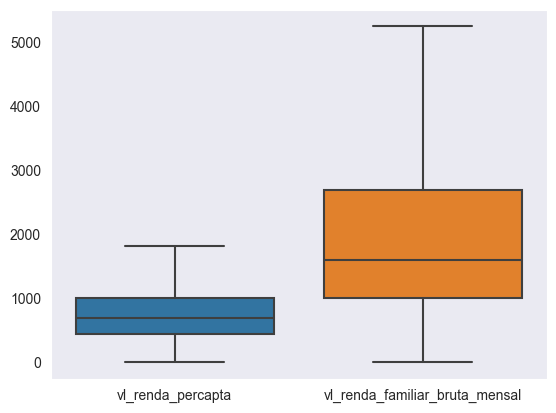

In [214]:
df_rendas = df[['vl_renda_percapta', 'vl_renda_familiar_bruta_mensal' ]]

sns.boxplot(
    data = df_rendas,
    showfliers=False
)

## Nota do ENEM

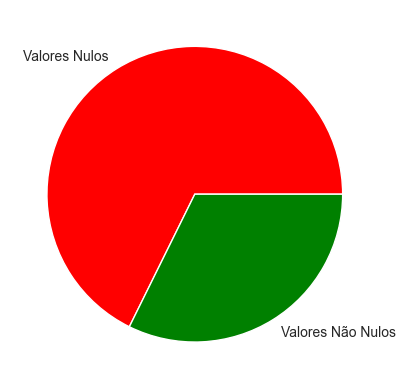

In [215]:
qto_null = df['vl_nota_enem_considerada'].isnull().sum()
percent_null = qto_null / df['vl_nota_enem_considerada'].size * 100

plt.pie(
    [percent_null, 100 - percent_null],
    labels=['Valores Nulos', 'Valores Não Nulos'],
    colors=['red', 'green']
)
plt.show()

In [216]:
df_enem_existe = df.loc[~df['vl_nota_enem_considerada'].isnull()]
df_enem_existe.head()

,safra_entrada,dt_nascimento,vl_renda_percapta,vl_renda_familiar_bruta_mensal,nu_percentual_solicitado,sexo,ds_raca_cor,ds_estado_civil,sg_uf_curso,no_curso,tipo_ultimo_aditamento,qtd_cursada_total,semestre_encerramento,banco,vl_total_liberado,vl_saldo_devedor,nu_dias_atraso,vl_saldo_devedor_atrasado,vl_nota_enem_considerada,idade
id_masked,,,,,,,,,,,,,,,,,,,,
49378,2015.1,1983-08-02,800.000,1600.000,75.000,F,PARDO,SOLTEIRO,BA,ADMINISTRACAO,Inscricao,1,12015.0,NaN,NaN,NaN,0,NaN,465.760,40.000
55562,2018.1,1992-05-21,1881.500,3763.000,100.000,F,BRANCO,CASADO,ES,DIREITO,Inscricao,1,nan,NaN,NaN,NaN,0,NaN,620.140,31.000
169504,2018.1,1985-12-20,916.670,2750.000,100.000,M,NEGRO,CASADO,BA,ENGENHARIA MECANICA,Inscricao,1,nan,NaN,NaN,NaN,0,NaN,533.920,37.000
201790,2017.2,1999-06-03,468.500,937.000,79.160,F,PARDO,SOLTEIRO,PA,HISTORIA,Encerramento,1,12018.0,NaN,NaN,NaN,0,NaN,596.240,24.000
223848,2017.1,1999-04-21,2016.940,8067.760,74.970,F,BRANCO,SOLTEIRO,RS,ENFERMAGEM,Encerramento,1,22017.0,NaN,NaN,NaN,0,NaN,610.480,24.000


In [217]:
df_enem_existe['vl_nota_enem_considerada'].corr(df_enem_existe['vl_renda_percapta'])

0.04904632854299852

<Axes: >

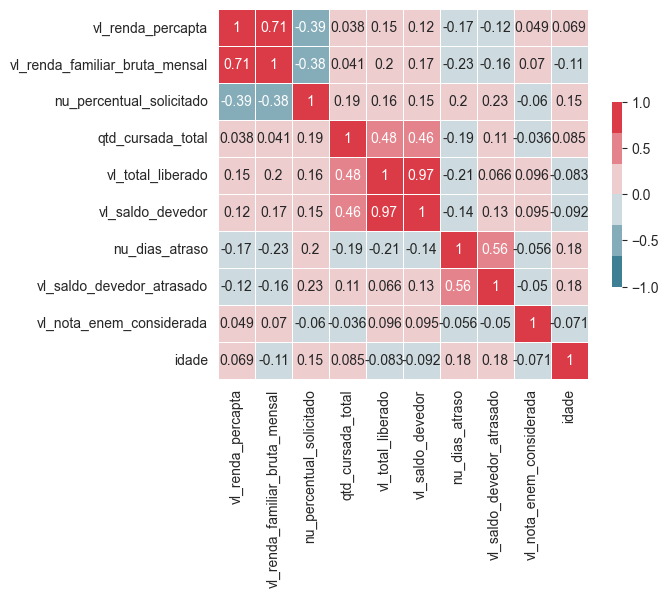

In [218]:


corr_total = df.corr(numeric_only=True)
cmap = sns.diverging_palette(220, 10)



sns.heatmap(corr_total, 
            annot=True, 
            cmap=cmap, 
            vmax=1,
            vmin=-1, 
            center=0, 
            square=True,
            linewidth=.5,
            cbar_kws={"shrink":.5},
           )


<Axes: >

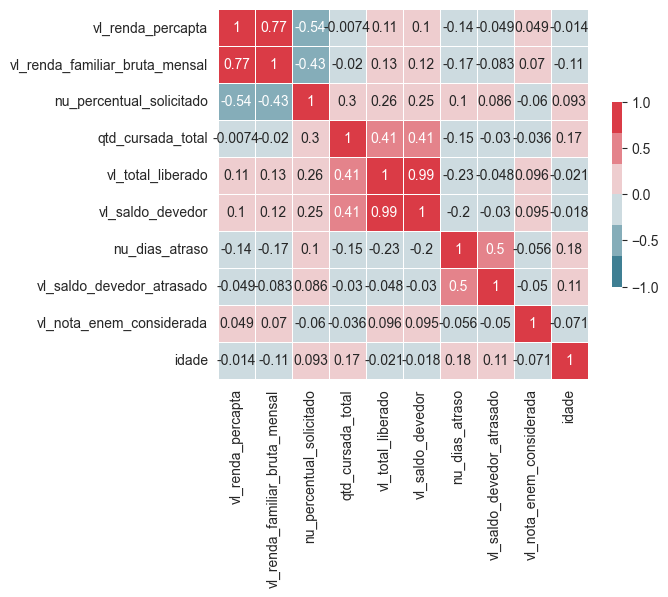

In [219]:
corr_apenas_enem = df_enem_existe.corr(numeric_only=True)
cmap = sns.diverging_palette(220, 10)

sns.heatmap(corr_apenas_enem, 
            annot=True, 
            cmap=cmap, 
            vmax=1,
            vmin=-1, 
            center=0, 
            square=True,
            linewidth=.5,
            cbar_kws={"shrink":.5},
           )

## Numero do Percentual Solicitado

In [220]:
df['nu_percentual_solicitado'].value_counts().sort_index(ascending=False)

nu_percentual_solicitado
100.000    1714331
99.420           2
99.380           3
99.370           3
99.350           2
            ...   
6.080            1
5.970            1
5.000          220
4.990           49
4.690            1
Name: count, Length: 7777, dtype: int64

<Axes: xlabel='nu_percentual_solicitado', ylabel='Count'>

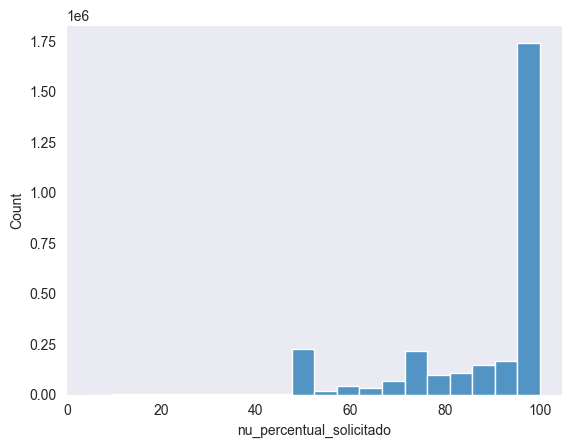

In [221]:
sns.histplot(
    data=df['nu_percentual_solicitado'],
    stat='count',
    bins=20
)

In [222]:
cat_percent = pd.cut(df['nu_percentual_solicitado'], 
    bins=[df['nu_percentual_solicitado'].min(), 60, 80, 100, 1000], 
    labels=['< 60%', '< 80%', '< 100%', '= 100%'],
    right=False    
)
cat_percent

id_masked
654        = 100%
968        = 100%
1067       = 100%
2214       = 100%
2298       = 100%
            ...  
2864534     < 60%
2864535    = 100%
2864536    = 100%
2864537    < 100%
2864538     < 60%
Name: nu_percentual_solicitado, Length: 2864537, dtype: category
Categories (4, object): ['< 60%' < '< 80%' < '< 100%' < '= 100%']

In [223]:
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

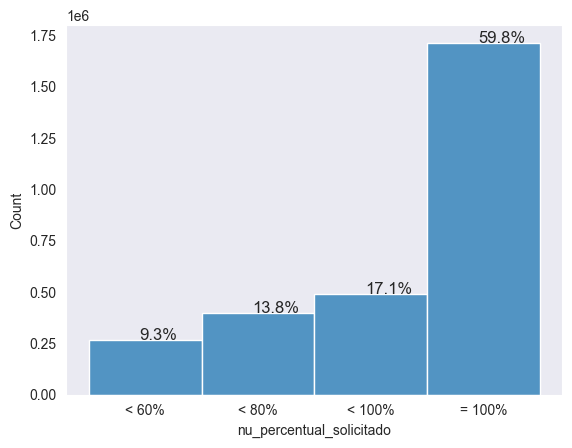

In [224]:
ax = sns.histplot(
    data=cat_percent,

)
without_hue(ax, cat_percent)


## Sexo

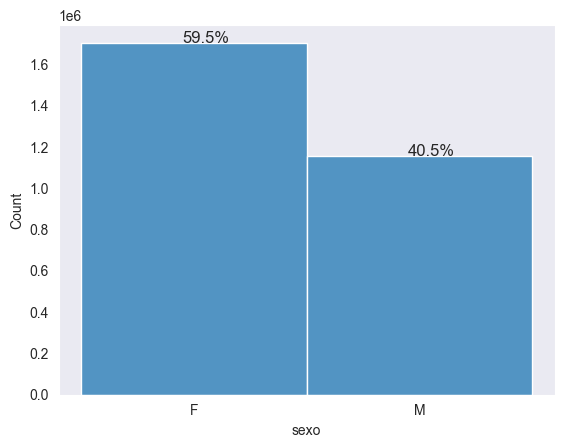

In [225]:
ax = sns.histplot(
    data=df['sexo'],
    stat='count'
)

without_hue(ax, df['sexo'])

Falta fazer isso:


1. ds_raca_cor
2. ds_estado_civil
3. banco
4. vl_total_liberado
5. nu_dias_atraso

6. vl_saldo_devedor
7. vl_saldo_devedor_atrasado

# Removendo outliers

1. Remover idades estranhas

In [229]:
df['idade'].describe()

count   2864426.000
mean         33.084
std           7.701
min          11.000
25%          28.000
50%          31.000
75%          37.000
max          80.000
Name: idade, dtype: float64

In [227]:
df.loc[df['idade'].idxmax()]

safra_entrada                                  2013.1
dt_nascimento                     1897-01-01 00:00:00
vl_renda_percapta                             339.000
vl_renda_familiar_bruta_mensal                678.000
nu_percentual_solicitado                      100.000
sexo                                                M
ds_raca_cor                                     PARDO
ds_estado_civil                              SOLTEIRO
sg_uf_curso                                        AP
no_curso                              EDUCACAO FISICA
tipo_ultimo_aditamento                      Suspensao
qtd_cursada_total                                   6
semestre_encerramento                             nan
banco                                              CX
vl_total_liberado                           21419.130
vl_saldo_devedor                            26488.140
nu_dias_atraso                                   2294
vl_saldo_devedor_atrasado                   12373.160
vl_nota_enem_considerada    

In [228]:
df = df.loc[df['idade'] <= 80]

df['idade'].describe()

count   2864426.000
mean         33.084
std           7.701
min          11.000
25%          28.000
50%          31.000
75%          37.000
max          80.000
Name: idade, dtype: float64